In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [49]:
df=pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [50]:
null_counts = df.isnull().sum()
null_counts

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [51]:
num_data = df.select_dtypes(include=[np.number])
num_data

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [52]:
# Define target (assuming 'price' or 'SalePrice' column is the target)
target_col = None
for col in num_data.columns:
    if 'price' in col.lower() or 'sale' in col.lower():
        target_col = col
        break

if target_col is None:
    raise ValueError("No column related to 'price' found. Please specify target manually.")
    
print(f"\nTarget Variable: {target_col}")


Target Variable: price


In [53]:
# Define features and target
X = num_data.drop(columns=[target_col])
y = num_data[target_col]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Use the first feature for univariate regression
uni_feature = X_train.columns[0]
X_train_uni = X_train[[uni_feature]]
X_test_uni = X_test[[uni_feature]]

uni_model = LinearRegression()
uni_model.fit(X_train_uni, y_train)

LinearRegression()

In [55]:
y_pred_uni = uni_model.predict(X_test_uni)

In [56]:
uni_feature

'area'

In [57]:
print("\n--- Univariate Linear Regression ---")
print("Feature used:", uni_feature)
print("Coefficient:", uni_model.coef_)
print("Intercept:", uni_model.intercept_)
print("R²:", r2_score(y_test, y_pred_uni))
print("MAE:", mean_absolute_error(y_test, y_pred_uni))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_uni)))


--- Univariate Linear Regression ---
Feature used: area
Coefficient: [425.72984194]
Intercept: 2512254.2639593435
R²: 0.27287851871974644
MAE: 1474748.1337969352
RMSE: 1917103.7021424233


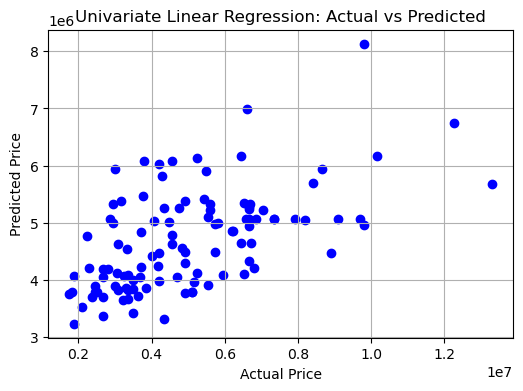

In [58]:
# Plot Actual vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_uni, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Univariate Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

In [59]:
# -----------------------------
# 4. Multivariate Linear Regression
# -----------------------------
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)
y_pred_multi = multi_model.predict(X_test)

In [60]:
print("\n--- Multivariate Linear Regression ---")
print("Coefficients:", multi_model.coef_)
print("Intercept:", multi_model.intercept_)
print("R²:", r2_score(y_test, y_pred_multi))
print("MAE:", mean_absolute_error(y_test, y_pred_multi))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_multi)))


--- Multivariate Linear Regression ---
Coefficients: [3.08866956e+02 1.51246751e+05 1.18573171e+06 4.95100763e+05
 3.37660830e+05]
Intercept: 51999.67680883873
R²: 0.5464062355495872
MAE: 1127483.3523235186
RMSE: 1514173.5520492233


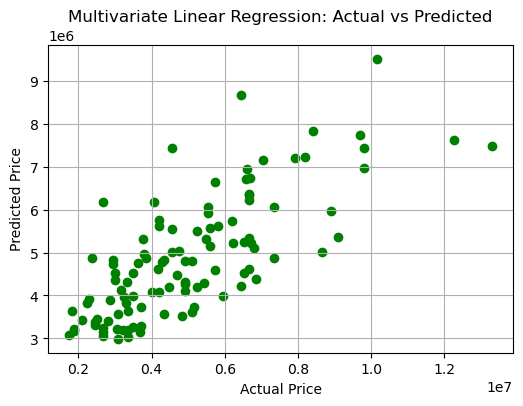

In [61]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_multi, color='green')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Multivariate Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()


In [62]:
# -----------------------------
# 5. Polynomial Regression
# -----------------------------
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [63]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

In [64]:
print("\n--- Polynomial Regression (degree=2) ---")
print("R²:", r2_score(y_test, y_pred_poly))
print("MAE:", mean_absolute_error(y_test, y_pred_poly))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))



--- Polynomial Regression (degree=2) ---
R²: 0.539794562245316
MAE: 1111158.81155637
RMSE: 1525169.076819938


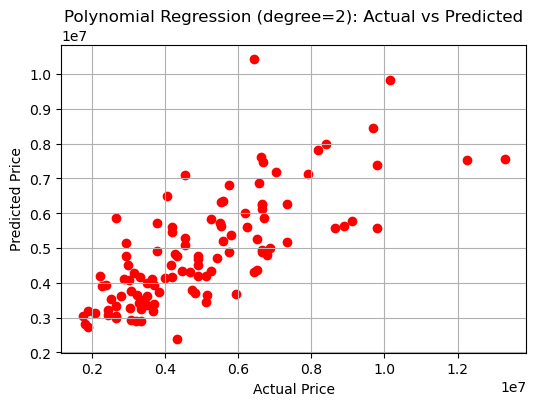

In [65]:
# Plot Actual vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_poly, color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Polynomial Regression (degree=2): Actual vs Predicted")
plt.grid(True)
plt.show()